In [1]:
# Ikenna ozoene ICA

# loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings      #to avoid warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12,10))

hf = pd.read_csv("framingham.csv")
hf.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Figure size 864x720 with 0 Axes>

.1 Data Dictionary 
age: age in years
sex: sex
1 = male
0 = female
cp: chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl

In [2]:
hf.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [3]:
# get number of row and column
num = hf.shape
print(num)

(4238, 16)


In [4]:
# describe the dataset
hf.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# checking for missing or null value
hf.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# Dropping the missing value

hf = hf.dropna()

In [8]:
hf.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
# here we run the correlation between the features and heart disease
hf.corr()["TenYearCHD"].sort_values(ascending=False)


TenYearCHD         1.000000
age                0.233810
sysBP              0.222885
prevalentHyp       0.181556
diaBP              0.150342
glucose            0.121942
diabetes           0.093397
male               0.091745
totChol            0.091127
BPMeds             0.089116
BMI                0.081931
cigsPerDay         0.052159
prevalentStroke    0.048351
heartRate          0.020523
currentSmoker      0.019176
education         -0.063068
Name: TenYearCHD, dtype: float64

<AxesSubplot:>

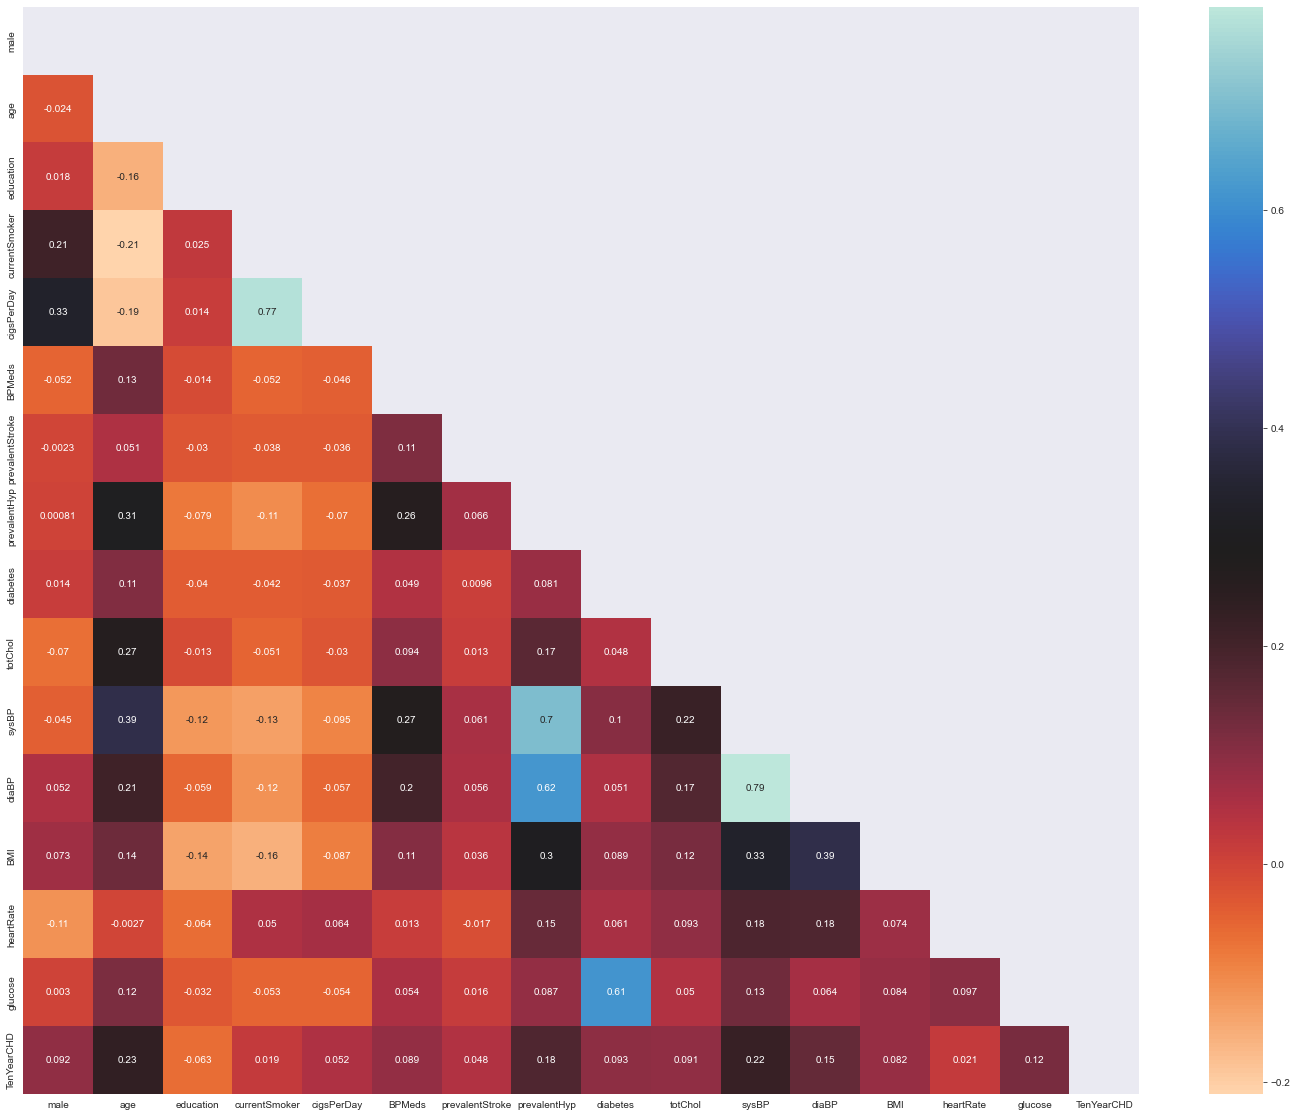

In [10]:
# visualizing the correlation for better understanding

plt.figure(figsize=(25,20))
mask = np.zeros_like(hf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hf.corr(),cmap="icefire_r",annot=True,linewidths=0, linecolor='white',cbar=True,mask=mask)


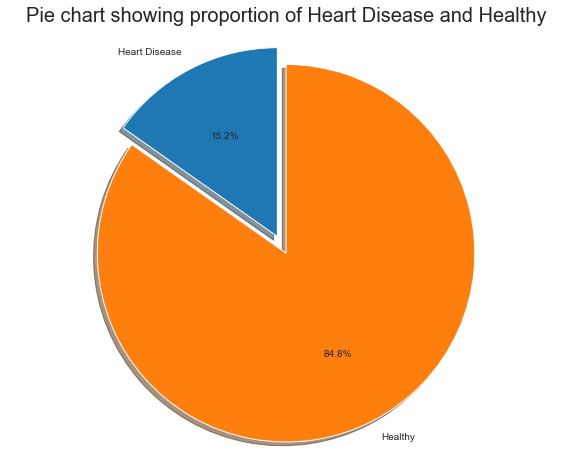

In [11]:
# Data visualization

labels = 'Heart Disease', 'Healthy'
sizes = [hf.TenYearCHD[hf["TenYearCHD"]==1].count(), hf.TenYearCHD[hf["TenYearCHD"]==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Pie chart showing proportion of Heart Disease and Healthy", size = 20)
plt.show()

Seems that 15.2% of people have 10-year risk of future coronary heart disease. This also tells that the data is skewed which we will handle later.

Distribution of boolean variables
 “1” means “Yes”, “0” means “No”


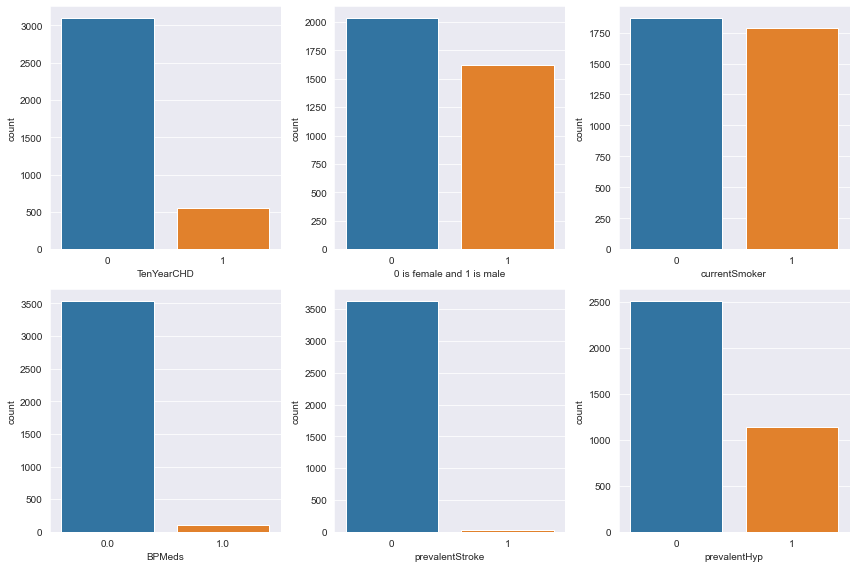

In [12]:
print("Distribution of boolean variables")
print(' “1” means “Yes”, “0” means “No”')
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
sns.countplot(hf.TenYearCHD,ax=axes[0,0])
sns.countplot(hf.male,ax=axes[0,1])
axes[0,1].set_xlabel("0 is female and 1 is male")
sns.countplot(hf.currentSmoker,ax=axes[0,2])
sns.countplot(hf.BPMeds,ax=axes[1,0])
sns.countplot(hf.prevalentStroke,ax=axes[1,1])
sns.countplot(hf.prevalentHyp,ax=axes[1,2])
plt.tight_layout()

<AxesSubplot:xlabel='age', ylabel='count'>

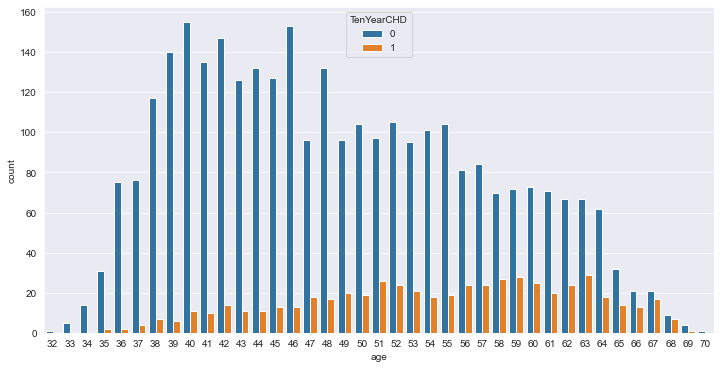

In [13]:
#Plotting histogram of age with respect to TenYearCHD
plt.figure(figsize=(12, 6))
sns.countplot('age',hue='TenYearCHD',data=hf)

Insight : There seems to be increased risk with age

1.There seems to be a slighlty higher risk if its a male.
2.The smaller a person's risk, the better educated they are. It makes sense because they are better aware of how to care for themselves. 
3.Both smokers and nonsmokers are at risk. 
4.People who take blood pressure medications are at a higher risk. 
5.People who have suffered a stroke are more vulnerable. 
6.Hypertensive people are at a higher risk. 
7.Diabetes patients are at a higher risk.

Insight:

1.indiviual with risk of CHD seem to have slighlty elevated cholestrol levels
2.indiviual with risk of CHD seem to have elevated levels of systolic blood pressure (sysBP)
3.indiviual with risk of CHD seem to have elevated levels of diastolic blood pressure (diaBP)
4.indiviual with risk of CHD seem to have slighlty elevated BMI
5.indiviual with risk of CHD seem to have slighlty elevated heart rate
6.indiviual with risk of CHD seem to have slighlty elevated glucose levels

Text(0.5, 1.0, 'Distribution of  diastolic blood pressure by Heart Disease')

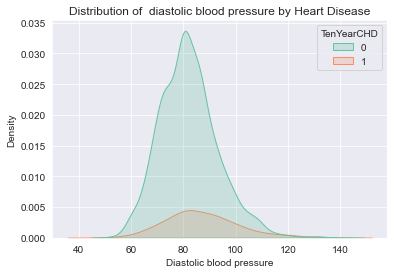

In [14]:
sns.set_style("darkgrid")
sns.kdeplot(x="diaBP",data=hf,palette="Set2",hue="TenYearCHD",shade=True)
sns.set(rc={'figure.figsize':(20,12)})
plt.ylabel('Density');
plt.xlabel('Diastolic blood pressure');
plt.title('Distribution of  diastolic blood pressure by Heart Disease')

Text(0.5, 1.0, 'Distribution of  systolic blood pressure  by Heart Disease')

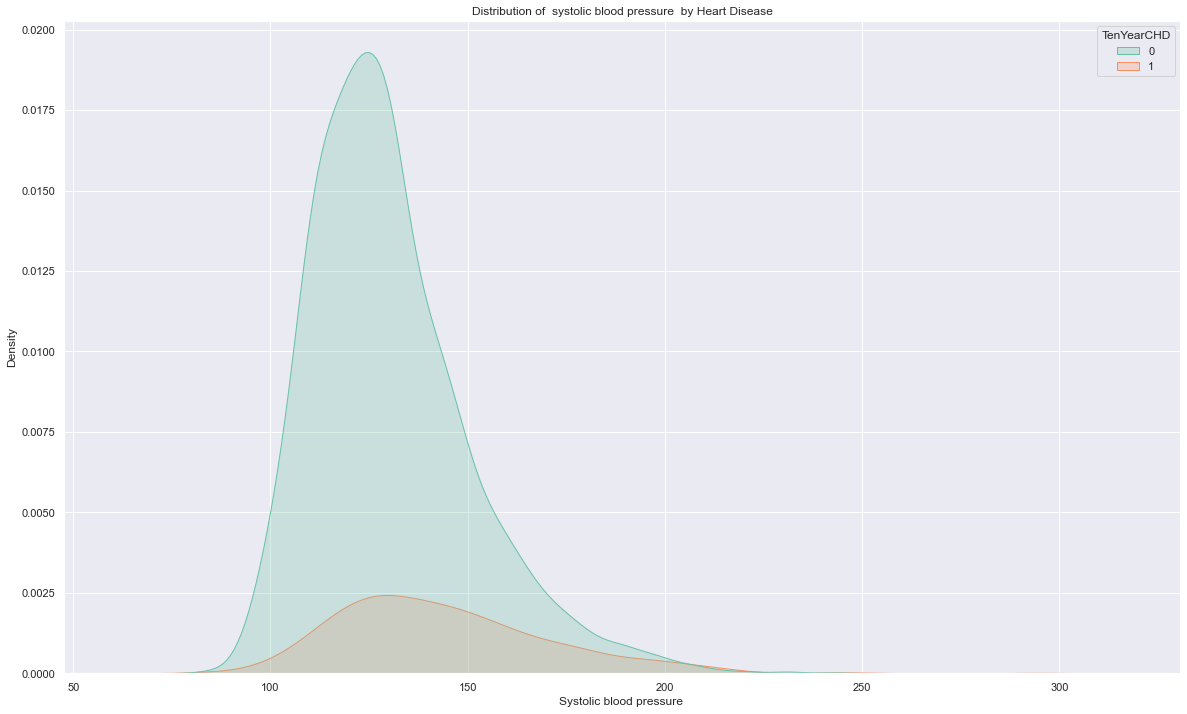

In [15]:
sns.set_style("darkgrid")
sns.kdeplot(x="sysBP",data=hf,palette="Set2",hue="TenYearCHD",shade=True)
sns.set(rc={'figure.figsize':(20,12)})
plt.ylabel('Density');
plt.xlabel('Systolic blood pressure ');
plt.title('Distribution of  systolic blood pressure  by Heart Disease')

<AxesSubplot:xlabel='TenYearCHD', ylabel='male'>

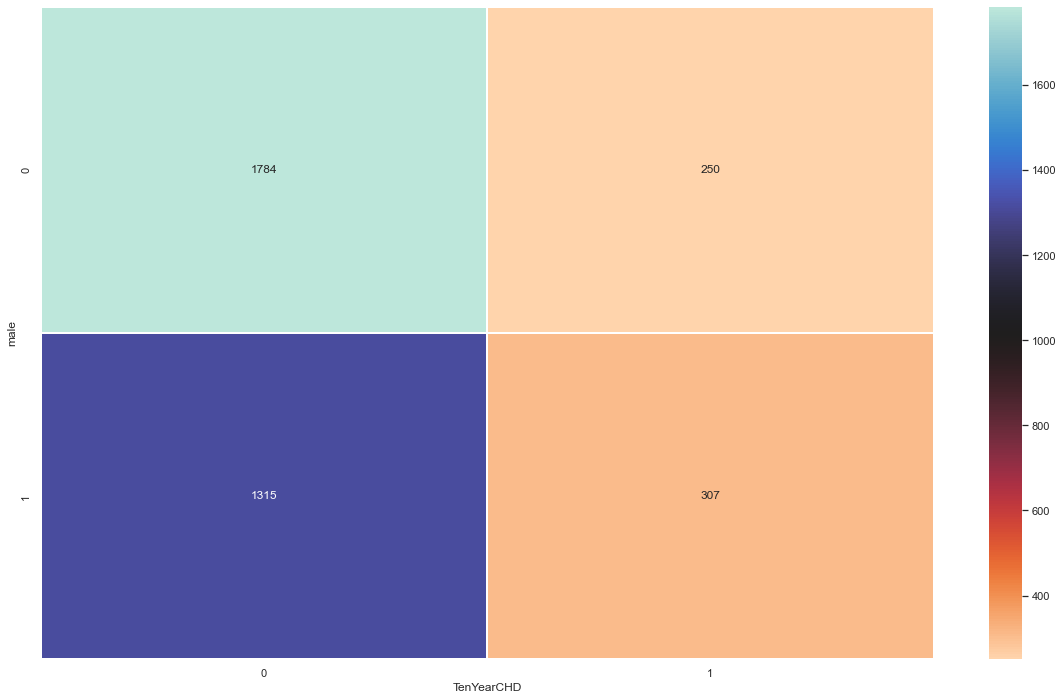

In [33]:
#Male
from scipy.stats import chi2_contingency
c=pd.crosstab(hf['male'], hf['TenYearCHD'])
sns.heatmap(c,cmap="icefire_r", annot=True, fmt='d', linecolor= "white", linewidth=.2,)

In [34]:
stat, p, dof, expected = chi2_contingency(c)
  
# interpret p-value
alpha = 0.05
print("Chi-Square Test Result")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Chi-Square Test Result
p value is 3.7758919146380037e-08
Dependent (reject H0)


Therefore, H0 was rejected,that is, the ten-year risk of coronary heart diease and gender have a significant relation.

male have HF more than female

In [35]:
#Age
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
hf['agerange'] = pd.cut(hf.age, bins, labels = labels,include_lowest = True)

<AxesSubplot:xlabel='TenYearCHD', ylabel='agerange'>

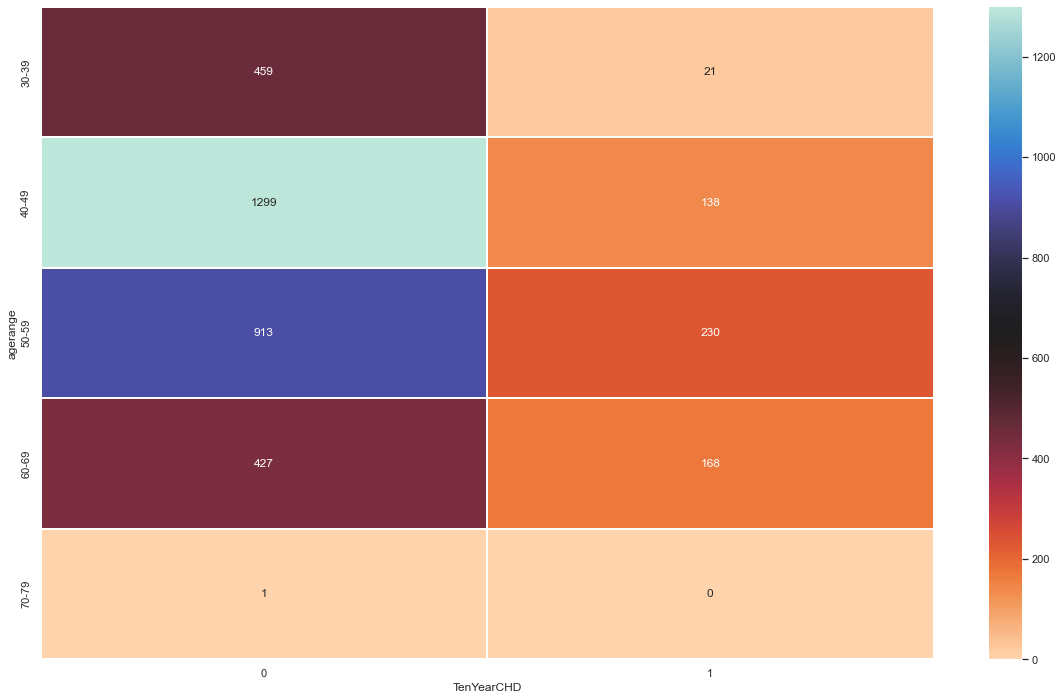

In [36]:
age_CHD_table=pd.crosstab(hf['agerange'],columns=hf['TenYearCHD'])
sns.heatmap(age_CHD_table,cmap="icefire_r", annot=True, fmt='d', linecolor= "white", linewidth=.2,)

In the above table the age frequency table and the first graph, it can be said that 50 - 59 age group is most as 230 have HF but 70 - 79 dont have HF

<AxesSubplot:xlabel='TenYearCHD', ylabel='education'>

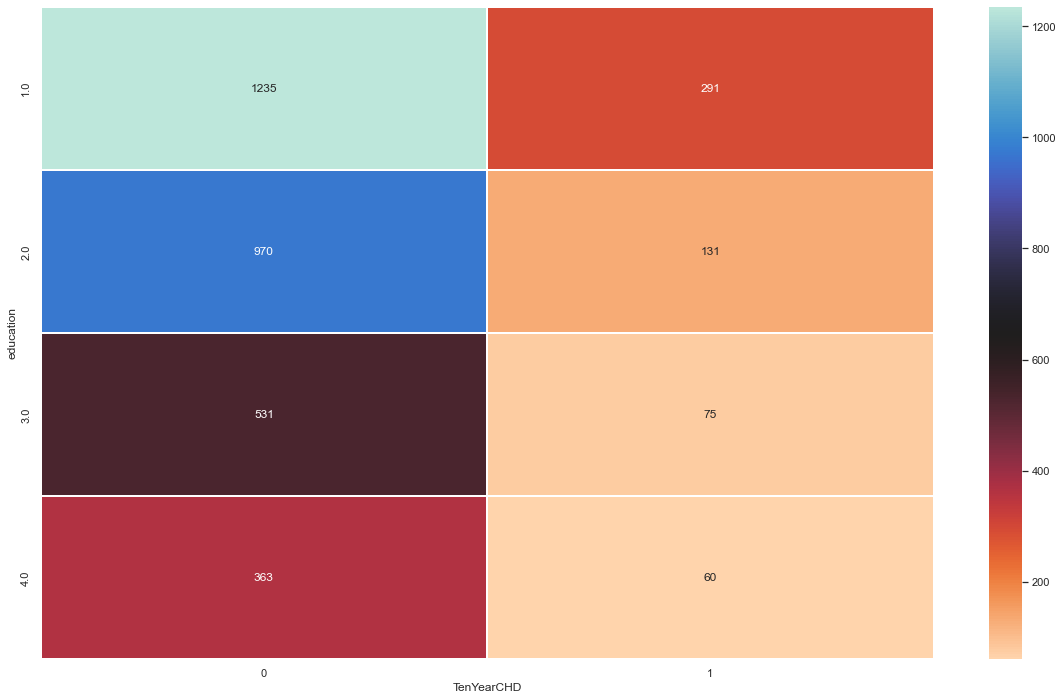

In [39]:
#EDUCATION
c=pd.crosstab(hf['education'], hf['TenYearCHD'])
sns.heatmap(c,cmap="icefire_r", annot=True, fmt='d', linecolor= "white", linewidth=.2,)

In [38]:
stat, p, dof, expected = chi2_contingency(c)
  
# interpret p-value
alpha = 0.05
print("Chi-Square Test Result")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Chi-Square Test Result
p value is 8.246210529929296e-07
Dependent (reject H0)


Therefore, H0 was rejected, that is the ten-years risks of heart fauilar and education have a significant relation.

<AxesSubplot:xlabel='TenYearCHD', ylabel='prevalentStroke'>

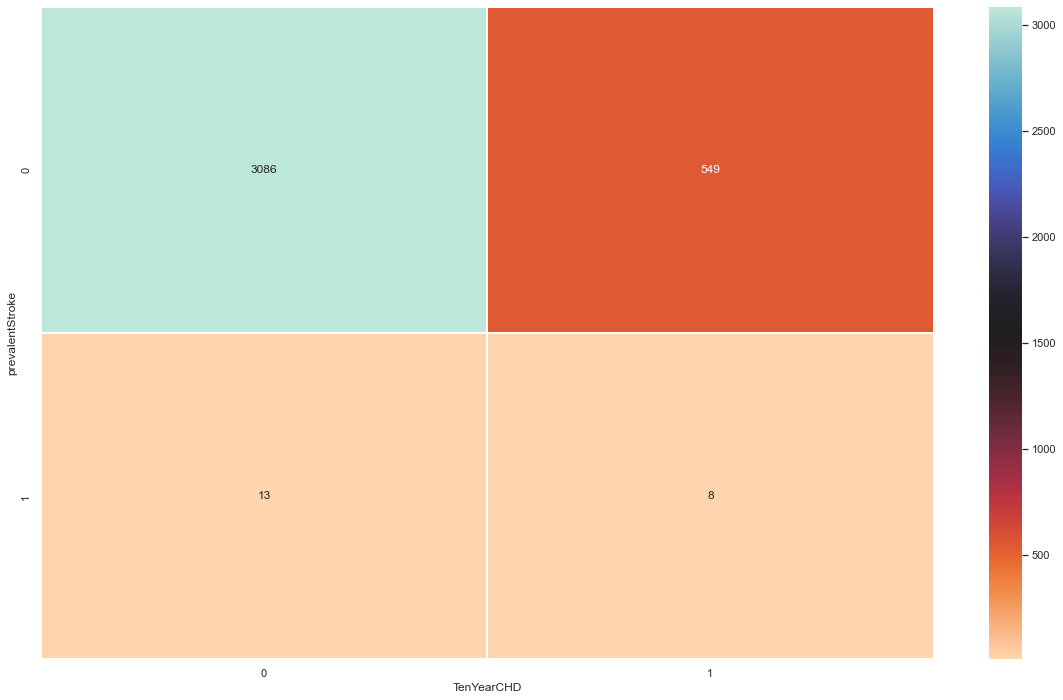

In [40]:
#PREVALENT STROKE
c=pd.crosstab(hf['prevalentStroke'], hf['TenYearCHD'])
sns.heatmap(c,cmap="icefire_r", annot=True, fmt='d', linecolor= "white", linewidth=.2,)

Persons with coronary heart disease are 44 percent more likely to be in the data set that includes just 21 people who had had a stroke before. This appears to be a large proportion, but the sample size is so little that any additional significance may be inferred from the data alone.

In [41]:
stat, p, dof, expected = chi2_contingency(c)
  
# interpret p-value
alpha = 0.05
print("Chi-Square Test Result")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Chi-Square Test Result
p value is 0.00881836309704503
Dependent (reject H0)


therefore, H0 was rejected that is the ten year risk of heart disease and prevalent stroke have a significant relation.

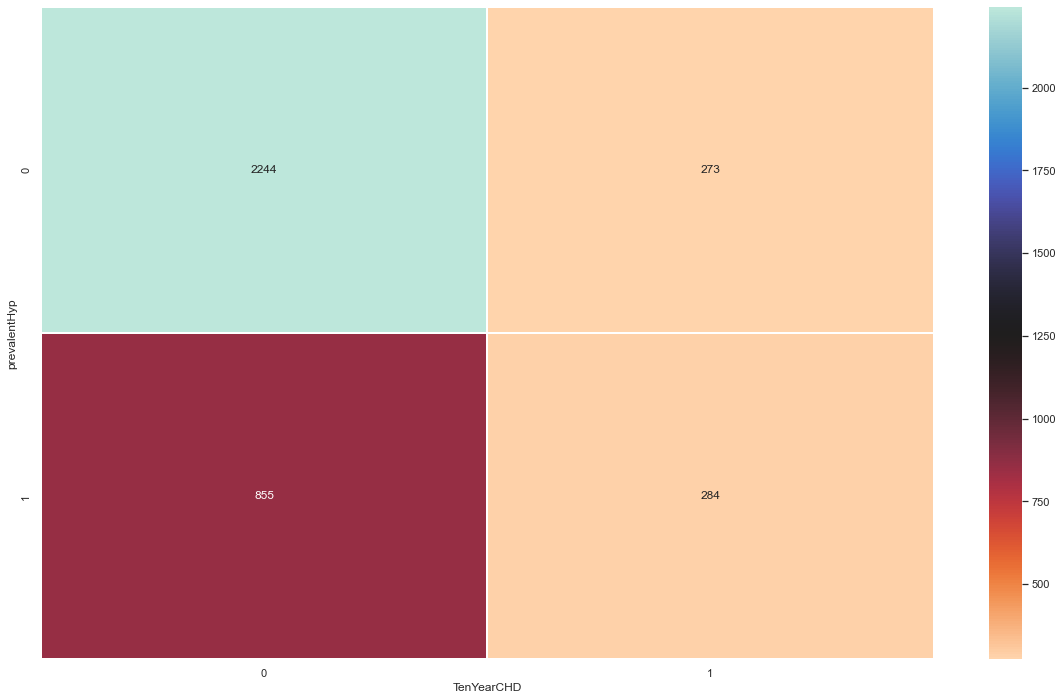

In [42]:
#PREVALENT HYPERTENSION
c=pd.crosstab(hf['prevalentHyp'], hf['TenYearCHD'])
sns.heatmap(c, cmap="icefire_r", annot=True, fmt='d', linecolor= "white", linewidth=.2,);

In [43]:
stat, p, dof, expected = chi2_contingency(c)
  
# interpret p-value
alpha = 0.05
print("Chi-Square Test Result")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Chi-Square Test Result
p value is 8.460395090713443e-28
Dependent (reject H0)


Therefore, H0 was rejected, that is, the 10-year risk of coronary heart disease and prevalent hypertension have a significant relation.

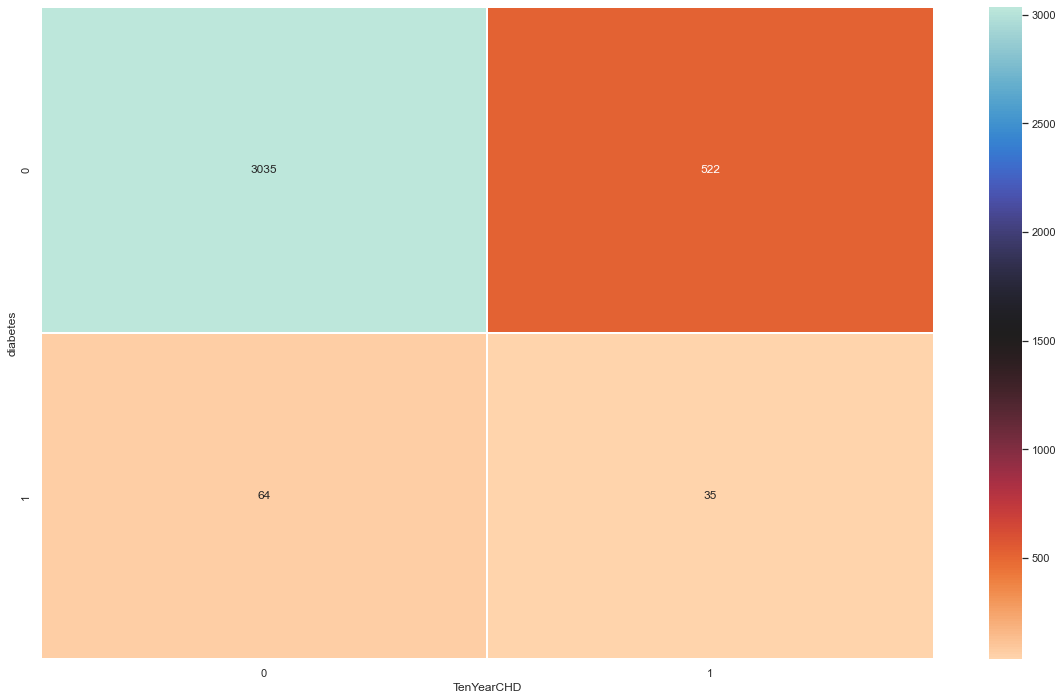

In [44]:
#DIABETES
c=pd.crosstab(hf['diabetes'], hf['TenYearCHD'])
sns.heatmap(c, cmap="icefire_r", annot=True, fmt='d', linecolor= "white", linewidth=.2,);

The table above shows the frequencies of people who have diabetes or not by the 10-year risk of coronary heart disease. And by that, it can be concluded that there is a huge difference in percentages for people who have diabetes. For people who don't have diabetes, the risk is 14.6 percent while for the other group the risk is 63.3 percent.

In [45]:
stat, p, dof, expected = chi2_contingency(c)
  
# interpret p-value
alpha = 0.05
print("Chi-Square Test Result")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Chi-Square Test Result
p value is 3.68136016818009e-08
Dependent (reject H0)


Therefore, H0 was rejected, that is, the 10-year risk of coronary heart disease and diabetes have a significant relation.

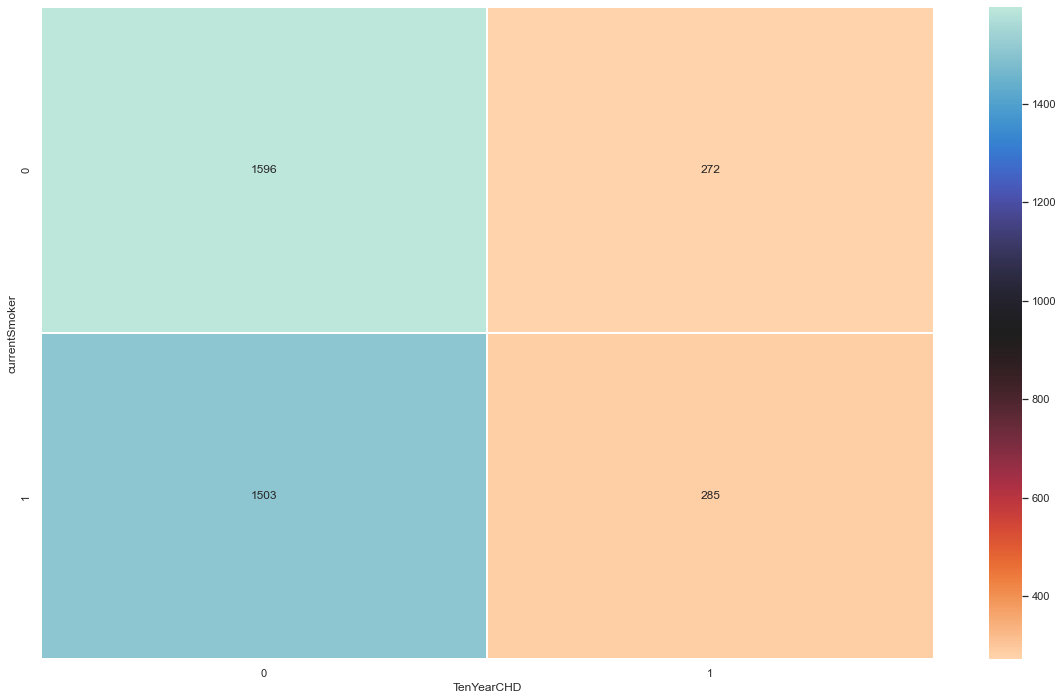

In [46]:
#SMOKING STATUS
c=pd.crosstab(hf['currentSmoker'], hf['TenYearCHD'])
sns.heatmap(c, cmap="icefire_r", annot=True, fmt='d', linecolor= "white", linewidth=.2,);

In [47]:
stat, p, dof, expected = chi2_contingency(c)
  
# interpret p-value
alpha = 0.05
print("Chi-Square Test Result")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Chi-Square Test Result
p value is 0.26551383909315107
Independent (H0 holds true)


Therefore, H0 was accepted, that is, the 10-year risk of heart disease and smoking status does not have a significant relation.

In [18]:
# Data processing

# Splitting Data into Training and Test Set

X = hf.drop("TenYearCHD",axis=1)
y = hf["TenYearCHD"]
print(X.columns)
print(y)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2924, 15)
(732, 15)
(2924,)
(732,)


In [20]:
# Algorithyms

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Regression Anlysis
from sklearn.linear_model import LogisticRegression
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[602   8]
 [112  10]]


Accuracy of Logistic Regression: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732



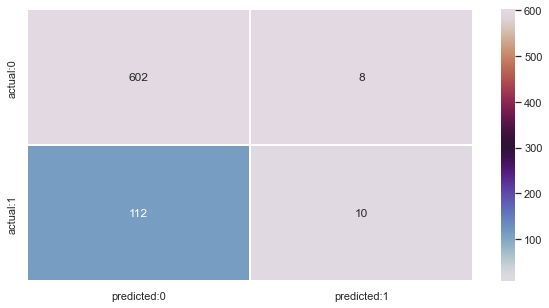

In [22]:
conf_matrix1 = confusion_matrix(y_test, lr_predict)

plt.figure(figsize=(10,5))

con_mat1 = pd.DataFrame(data=conf_matrix1,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
sns.heatmap(con_mat1, annot=True,fmt='d',linecolor= "white", linewidth=.2, cmap='twilight');

In [23]:

from sklearn.ensemble import RandomForestClassifier

m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[608   2]
 [119   3]]


Accuracy of Random Forest: 83.46994535519126 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       610
           1       0.60      0.02      0.05       122

    accuracy                           0.83       732
   macro avg       0.72      0.51      0.48       732
weighted avg       0.80      0.83      0.77       732



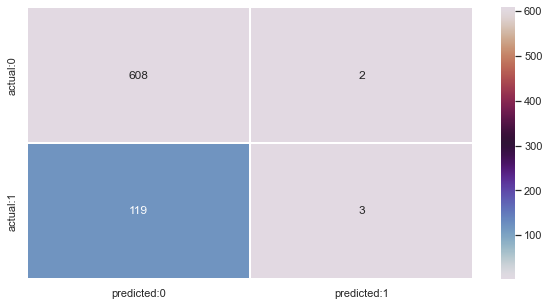

In [24]:
conf_matrix2 = confusion_matrix(y_test, rf_predicted)

plt.figure(figsize=(10,5))

con_mat = pd.DataFrame(data=conf_matrix2,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
sns.heatmap(con_mat, annot=True,fmt='d',linecolor= "white", linewidth=.2, cmap='twilight');

In [25]:
from sklearn.naive_bayes import GaussianNB
model3 = 'Naive Bayes'
md = GaussianNB()
md.fit(X_train,y_train)
mdpred = md.predict(X_test)
md_conf_matrix = confusion_matrix(y_test, mdpred)
md_acc_score = accuracy_score(y_test, mdpred)
print("confussion matrix")
print(md_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",md_acc_score*100,'\n')
print(classification_report(y_test,mdpred))

confussion matrix
[[565  45]
 [100  22]]


Accuracy of Naive Bayes model: 80.19125683060109 

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       610
           1       0.33      0.18      0.23       122

    accuracy                           0.80       732
   macro avg       0.59      0.55      0.56       732
weighted avg       0.76      0.80      0.78       732



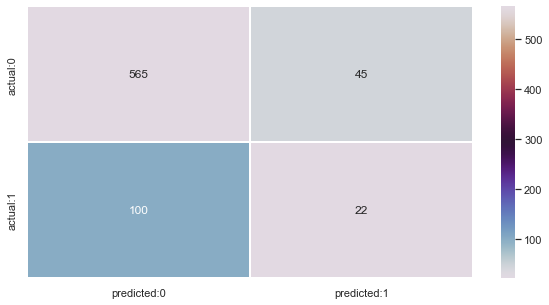

In [26]:
conf_matrix3 = confusion_matrix(y_test, mdpred)

plt.figure(figsize=(10,5))

con_mat = pd.DataFrame(data=conf_matrix3,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
sns.heatmap(con_mat, annot=True,fmt='d',linecolor= "white", linewidth=.2, cmap='twilight');

In [27]:
from sklearn.tree import DecisionTreeClassifier
m4 = 'DecisionTreeClassifier'
mdt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
mdt.fit(X_train, y_train)
mdt_predicted = mdt.predict(X_test)
mdt_conf_matrix = confusion_matrix(y_test, mdt_predicted)
mdt_acc_score = accuracy_score(y_test, mdt_predicted)
print("confussion matrix")
print(mdt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",mdt_acc_score*100,'\n')
print(classification_report(y_test,mdt_predicted))

confussion matrix
[[583  27]
 [111  11]]


Accuracy of DecisionTreeClassifier: 81.14754098360656 

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       610
           1       0.29      0.09      0.14       122

    accuracy                           0.81       732
   macro avg       0.56      0.52      0.52       732
weighted avg       0.75      0.81      0.77       732



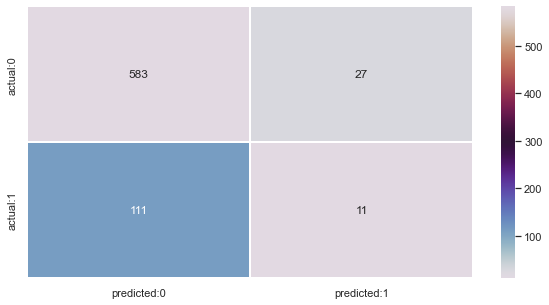

In [28]:
conf_matrix4 = confusion_matrix(y_test, mdt_predicted)

plt.figure(figsize=(10,5))

con_mat = pd.DataFrame(data=conf_matrix4,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
sns.heatmap(con_mat, annot=True,fmt='d',linecolor= "white", linewidth=.2, cmap='twilight');

In [29]:
from sklearn.svm import SVC
m5 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[601   9]
 [118   4]]


Accuracy of Support Vector Classifier: 82.65027322404372 

              precision    recall  f1-score   support

           0       0.84      0.99      0.90       610
           1       0.31      0.03      0.06       122

    accuracy                           0.83       732
   macro avg       0.57      0.51      0.48       732
weighted avg       0.75      0.83      0.76       732



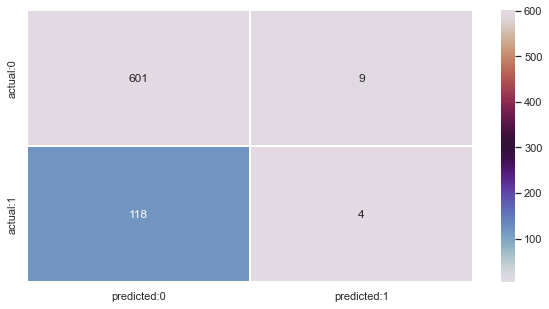

In [30]:
conf_matrix5 = confusion_matrix(y_test, svc_predicted)

plt.figure(figsize=(10,5))

con_mat = pd.DataFrame(data=conf_matrix5,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
sns.heatmap(con_mat, annot=True,fmt='d',linecolor= "white", linewidth=.2, cmap='twilight');

In [31]:
# Model Evaluation

model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    md_acc_score*100,rf_acc_score*100,mdt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,83.606557
1,Naive Bayes,80.191257
2,Random Forest,83.469945
3,Decision Tree,81.147541
4,Support Vector Machine,82.650273


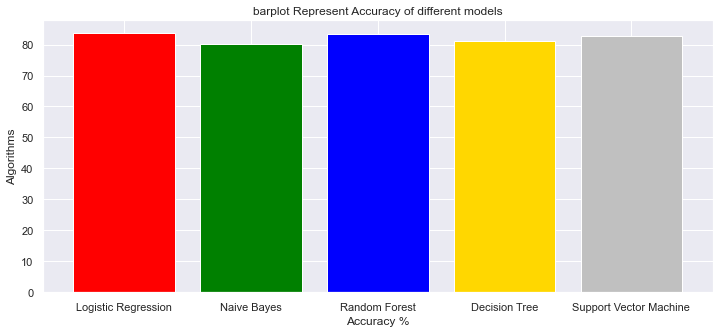

In [32]:
colors = ['red','green','blue','gold','silver',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()